In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("C:\\Users\\srnva\\Desktop\\UDEMY\\Open CV\\Computer-Vision-with-Python\\DATA\\car_plate.jpg")

In [6]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(new_img)

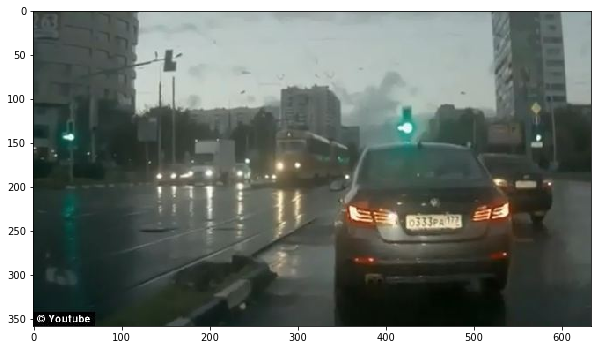

In [7]:
display(img)

In [8]:
plate_cascade = cv2.CascadeClassifier("C:\\Users\\srnva\\Desktop\\UDEMY\\Open CV\\Computer-Vision-with-Python\\DATA\\haarcascades\\haarcascade_russian_plate_number.xml")

In [22]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=4)
    
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img, (x,y), (x+w,y+h), (255,0,0),5)
    return plate_img

In [23]:
result = detect_plate(img)

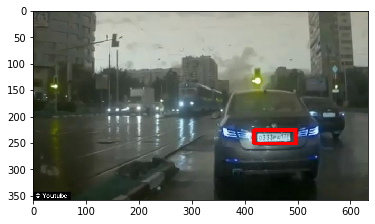

In [24]:
plt.imshow(result)

## Blurring

In [26]:
def detect_blur_plate(img):
    plate_img = img.copy()
    roi = img.copy()
    
    plate_rects = plate_cascade.detectMultiScale(plate_img, scaleFactor=1.3, minNeighbors=4)
    
    for (x,y,w,h) in plate_rects:
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,7)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img

In [28]:
result = detect_blur_plate(img)

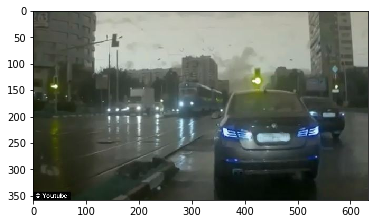

In [29]:
plt.imshow(result)